# Modern deep learning

## Review - logistic regression code

Reading and transforming data...
Performing logistic regresion...
Iter: 10/100,
 Train loss: 13844.380
Train error: 0.096, Test loss: 408.819
Test err: 0.110


Iter: 20/100,
 Train loss: 12099.970
Train error: 0.083, Test loss: 365.218
Test err: 0.097


Iter: 30/100,
 Train loss: 11420.852
Train error: 0.078, Test loss: 352.185
Test err: 0.094


Iter: 40/100,
 Train loss: 11024.909
Train error: 0.075, Test loss: 345.941
Test err: 0.093


Iter: 50/100,
 Train loss: 10746.742
Train error: 0.074, Test loss: 342.428
Test err: 0.093


Iter: 60/100,
 Train loss: 10533.363
Train error: 0.072, Test loss: 340.286
Test err: 0.093


Iter: 70/100,
 Train loss: 10360.755
Train error: 0.070, Test loss: 338.904
Test err: 0.093


Iter: 80/100,
 Train loss: 10216.177
Train error: 0.069, Test loss: 337.981
Test err: 0.094


Iter: 90/100,
 Train loss: 10092.017
Train error: 0.068, Test loss: 337.357
Test err: 0.095


Iter: 100/100,
 Train loss: 9983.362
Train error: 0.068, Test loss: 336.937
Test err: 0.

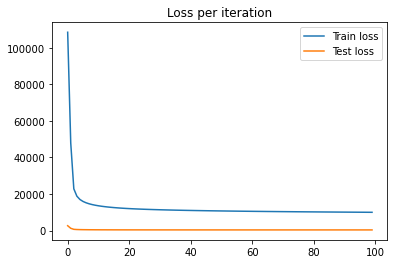

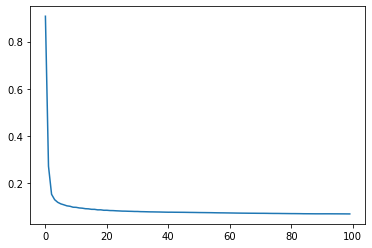

In [8]:
import numpy as np
import pandas as pd
from utils import get_normalized_data, y2indicator, forward, cost, error_rate, predict, gradW, gradb


def linear_benchmark():
    Xtrain, Xtest, Ytrain, Ytest = get_normalized_data()
    
    print("Performing logistic regresion...")
    
    # convert Ytrain and Ytest to (N x K) matrices of indicator variables
    N, D = Xtrain.shape
    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)
    K = Ytrain_ind.shape[1]
    
    W = np.random.randn(D, K) / np.sqrt(D)
    b = np.zeros(K)
    train_losses = []
    test_losses = []
    train_classification_errors = []
    test_classification_errors = []
    
    lr = 0.00003
    reg = 0.0
    n_iters = 100
    for i in range(n_iters):
        p_y = forward(Xtrain, W, b)
        train_loss = cost(p_y, Ytrain_ind)
        train_losses.append(train_loss)
        
        train_err = error_rate(p_y, Ytrain)
        train_classification_errors.append(train_err)
        
        p_y_test = forward(Xtest, W, b)
        test_loss = cost(p_y_test, Ytest_ind)
        test_losses.append(test_loss)
        
        test_err = error_rate(p_y_test, Ytest)
        test_classification_errors.append(test_err)
        
        W += lr*(gradW(Ytrain_ind, p_y, Xtrain) - reg*W)
        b += lr*gradb(Ytrain_ind, p_y)
        if (i + 1) % 10 == 0:
            print(f"Iter: {i+1}/{n_iters},\n Train loss: {train_loss:.3f}\n"
                  f"Train error: {train_err:.3f}, Test loss: {test_loss:.3f}\n"
                  f"Test err: {test_err:.3f}\n\n")
    
    p_y = forward(Xtest, W, b)
    print("Final error rate", error_rate(p_y, Ytest))
    
    plt.plot(train_losses, label='Train loss')
    plt.plot(test_losses, label='Test loss')
    plt.title("Loss per iteration")
    plt.legend()
    plt.show()
    
    plt.plot(train_classification_errors, label='Train error')
            
linear_benchmark()